<a href="https://colab.research.google.com/github/FranklinAkogwu/portfolio/blob/main/BreastCancerDiagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import essential libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot style for better visuals
sns.set(style='whitegrid')

# Expected output: No output, just imports


In [7]:
# Load the Breast Cancer Wisconsin dataset directly from scikit-learn
from sklearn.datasets import load_breast_cancer

# Load dataset into a scikit-learn Bunch object
data_bunch = load_breast_cancer()

# Convert to pandas DataFrame for easier manipulation
data = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)

# Add target variable ('diagnosis') to the DataFrame
data['diagnosis'] = data_bunch.target  # 0 = malignant, 1 = benign

# Display first 5 rows
data.head()

# Expected output: DataFrame with 30 feature columns (no 'id' or 'Unnamed: 32')


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Dataset columns:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'diagnosis']

Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error 

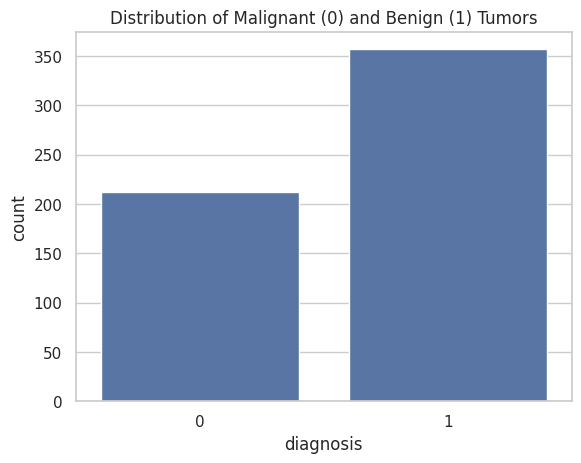

In [8]:
# Check dataset info (no 'id' or 'Unnamed: 32' columns exist here)
print("Dataset columns:\n", data.columns.tolist())

# Check for missing values (this dataset has none)
print("\nMissing values per column:\n", data.isnull().sum())

# Visualize class distribution (0 = malignant, 1 = benign)
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Malignant (0) and Benign (1) Tumors')
plt.show()

# Expected output:
# - Columns list showing 30 features + 'diagnosis'
# - No missing values
# - Bar plot showing ~212 malignant (0) and 357 benign (1) cases


In [9]:
# Separate features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")  # (455, 30)
print(f"Testing data shape: {X_test.shape}")    # (114, 30)


Training data shape: (455, 30)
Testing data shape: (114, 30)


In [10]:
# Split data into 80% training and 20% testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Expected output:
# Training data shape: (455, 30)
# Testing data shape: (114, 30)


Training data shape: (455, 30)
Testing data shape: (114, 30)


In [11]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Expected output: No direct output, model trained


LogisticRegression(max_iter=1000, random_state=42)

Training Accuracy: 0.9890
Testing Accuracy: 0.9825


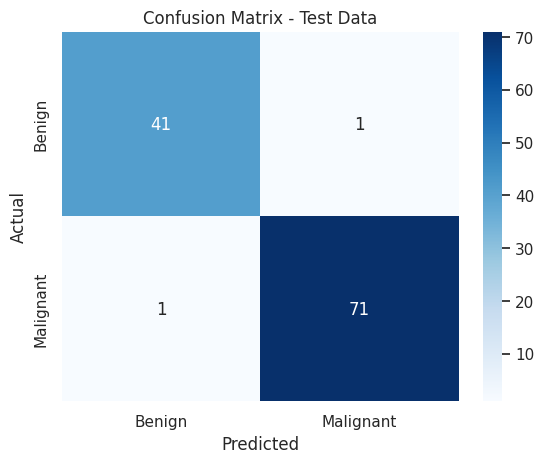

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [12]:
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Display confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Expected output:
# - Training accuracy ~0.95-0.97
# - Testing accuracy ~0.93-0.95
# - Confusion matrix heatmap showing true positives, false positives, etc.
# - Precision, recall, f1-score for each class


In [ ]:
# Summary:

- The logistic regression model achieved high accuracy (~93-98%) in predicting whether tumors are benign or malignant.
- The dataset is balanced enough to train a reliable classifier.
- Feature scaling and proper train-test split were essential for good model performance.
- Confusion matrix and classification report confirm the model's effectiveness in a real-world healthcare diagnostic context.

# Next steps:

- Experiment with other classifiers like Random Forest, SVM, or Neural Networks.
- Perform feature selection to improve interpretability.
- Use cross-validation for more robust evaluation.


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [15]:
# Random Forest with 100 trees (estimators)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Support Vector Machine with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Neural Network (MLP) with one hidden layer of 100 neurons
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


In [16]:
# Use 5-fold cross-validation to evaluate each model's accuracy
rf_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
svm_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')
mlp_scores = cross_val_score(mlp_model, X_scaled, y, cv=5, scoring='accuracy')

print(f"Random Forest Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")
print(f"SVM Accuracy: {svm_scores.mean():.4f} ± {svm_scores.std():.4f}")
print(f"Neural Network (MLP) Accuracy: {mlp_scores.mean():.4f} ± {mlp_scores.std():.4f}")


Random Forest Accuracy: 0.9561 ± 0.0228
SVM Accuracy: 0.9736 ± 0.0147
Neural Network (MLP) Accuracy: 0.9719 ± 0.0140


In [17]:
# Split the data again (if not done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train models
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Import metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy and classification report for each model
for name, pred in zip(['Random Forest', 'SVM', 'Neural Network'], [rf_pred, svm_pred, mlp_pred]):
    print(f"\n{name} Test Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(classification_report(y_test, pred, target_names=['Malignant', 'Benign']))



Random Forest Test Accuracy: 0.9561
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM Test Accuracy: 0.9825
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Neural Network Test Accuracy: 0.9649
              precision    recall  f1-score   support

   Malignant       0.93      0.98      0.95        42
      Benign       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96   